In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def load_data(name, paths):
    data = [np.load(p) for p in paths]
    train = np.array([d['train'] for d in data])
    val = np.array([d['val'] for d in data])
    test = np.array([d['test'] for d in data])
    return {
        'name': name,
        'train_mean': train.mean(axis=0),
        'train_std': train.std(axis=0),
        'val_mean': val.mean(axis=0),
        'val_std': val.std(axis=0),
        'test_mean': test.mean(),
        'test_std': test.std(),
      }

In [46]:
x = np.arange(0, 100)

In [48]:
feat = load_data('Features & Spectral', ['runs/feat_rotations_2d_eigens_42.npz',
                                         'runs/feat_rotations_2d_eigens_43.npz',
                                         'runs/feat_rotations_2d_eigens_44.npz',
                                         ])
print(f"Loss for {feat['name']} is {feat['test_mean']:.4f}+-{feat['test_std']:.4f}")

Loss for Features & Spectral is 0.3782+-0.0141


In [55]:
def add_to_plot(ax, d, split):
    NUM_STD_DEV=2
    ax.plot(x, d[f'{split}_mean'])
    ax.fill_between(x, d[f'{split}_mean']-NUM_STD_DEV*d[f'{split}_std'] ,
                    d[f'{split}_mean']+NUM_STD_DEV*d[f'{split}_std'], alpha=0.2)

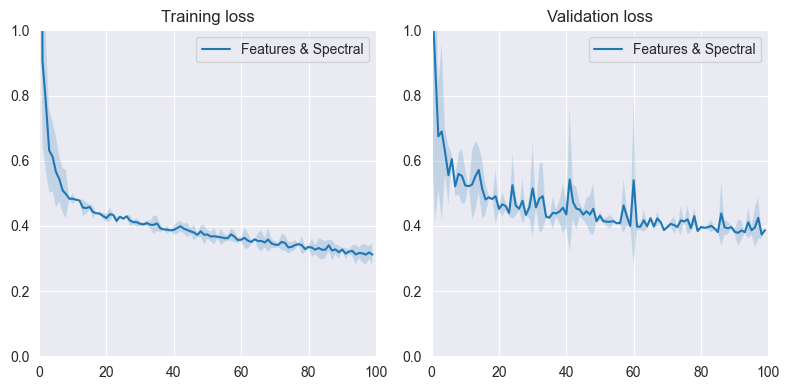

In [61]:
fig, (ax_train, ax_val) = plt.subplots(1,2, figsize=(8,4))

add_to_plot(ax_train, feat, 'train')
add_to_plot(ax_val, feat, 'val')

names = [feat['name']]

ax_train.set_ylim(0, 1)
ax_train.set_xlim(0, 100)
ax_train.set_title('Training loss')
ax_train.legend(names, loc='best')

ax_val.set_ylim(0, 1)
ax_val.set_xlim(0, 100)
ax_val.set_title('Validation loss')
ax_val.legend(names, loc='best')

fig.tight_layout()
fig.savefig('graphics/loss.png', dpi=400)
pass